In [1]:
#import packges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Ultimate Challenge

### Part 1 - Exploratory Data Analysis

In [2]:
#import logins data, datetime automatically managed
logins = pd.read_json('logins.json',convert_dates='login_time')

#set the login_time to index
logins.set_index('login_time',inplace=True)

#populate data for each index
logins['logon'] = 1

#resample to 15minute interval
ft_M=logins.resample('15T').count()

In [3]:
print('Original Dataset Date range: ',logins.index[0],' to ',logins.index[-1])

Original Dataset Date range:  1970-01-01 20:13:18  to  1970-04-13 18:54:23


Data starts at 20:13:18 of 1970-01-01 and finishes 04-13 18:54:23, therefore we do not have complete data for these begin and end dates.

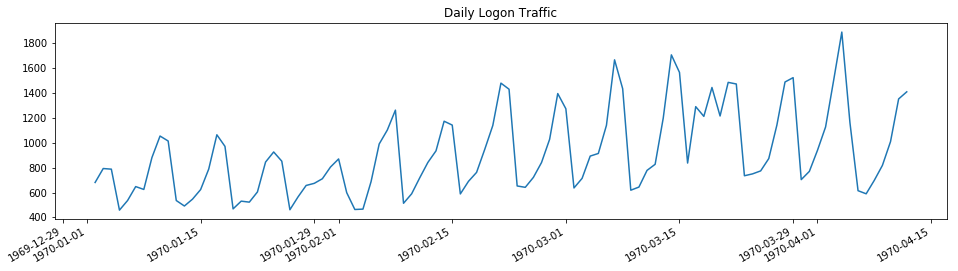

In [4]:
#plot a chart of daily logon traffic
plt.figure(figsize=(16,4))
plt.title('Daily Logon Traffic')
plt.plot(ft_M['1970-01-02':'1970-04-12'].resample('D').sum())
plt.gcf().autofmt_xdate()

There seems to be a pattern between the days as well.  We will look into this.

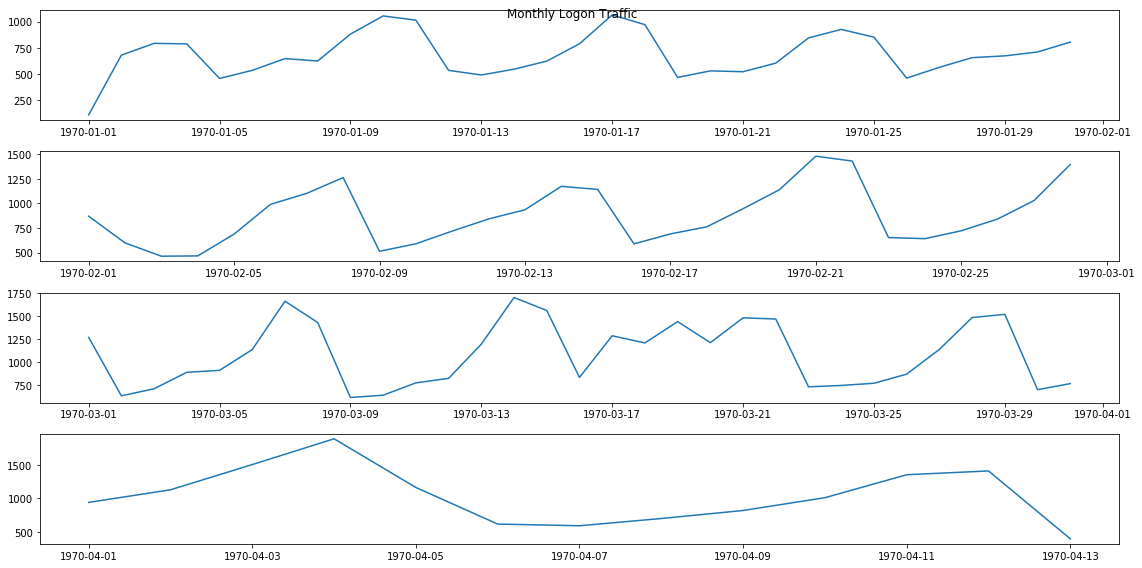

In [5]:
#plot a chart that expands the above logon traffic chart in one-month interval
fig1, axs = plt.subplots(nrows=4, figsize=(16,8))
fig1.suptitle('Monthly Logon Traffic',fontsize=12)

   
axs[0].plot(ft_M['1970-01-01':'1970-01-31'].resample('D').sum())
axs[1].plot(ft_M['1970-02-01':'1970-02-28'].resample('D').sum())
axs[2].plot(ft_M['1970-03-01':'1970-03-31'].resample('D').sum())
axs[3].plot(ft_M['1970-04-01':'1970-04-13'].resample('D').sum())

fig1.tight_layout()


From the expanded chart above, it is apparent that date itself is not the factor that drives the pattern. <br> It is the day as the peaking pattern is repeating every 7 days.

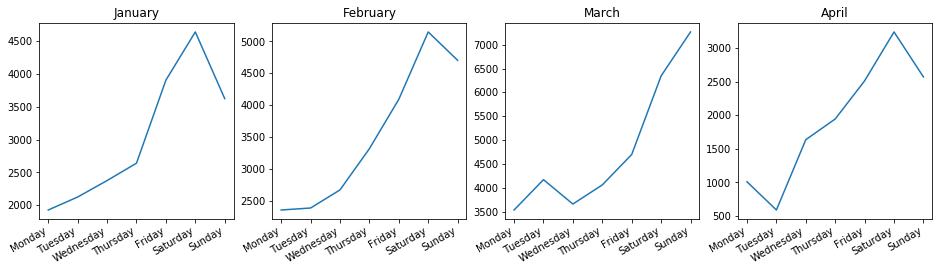

In [6]:
#define days of week
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#plot logon traffic per week of day
fig2, axs = plt.subplots(ncols=4,figsize=(16,4))

axs[0].set_title('January')
axs[0].plot(days,logins['1970-01'].groupby(logins['1970-01'].index.weekday).count())
axs[1].set_title('February')
axs[1].plot(days,logins['1970-02'].groupby(logins['1970-02'].index.weekday).count())
axs[2].set_title('March')
axs[2].plot(days,logins['1970-03'].groupby(logins['1970-03'].index.weekday).count())
axs[3].set_title('April')
axs[3].plot(days,logins['1970-04'].groupby(logins['1970-04'].index.weekday).count())

fig2.autofmt_xdate()

In [7]:
logins.resample('M').count()

,logon
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


It is clear from above that the logon traffic increase significantly as it gets near the weekend and peaks during the weekend. <br> Also from the looks of it, the total traffic per month was on an upward trend with March having the highest traffic.  <br> We only have up to Apr 13th data so the April data is smaller compared to the rest. 

In [8]:
print('15Minutes Date range: ',ft_M.index[0],' to ',ft_M.index[-1])

15Minutes Date range:  1970-01-01 20:00:00  to  1970-04-13 18:45:00


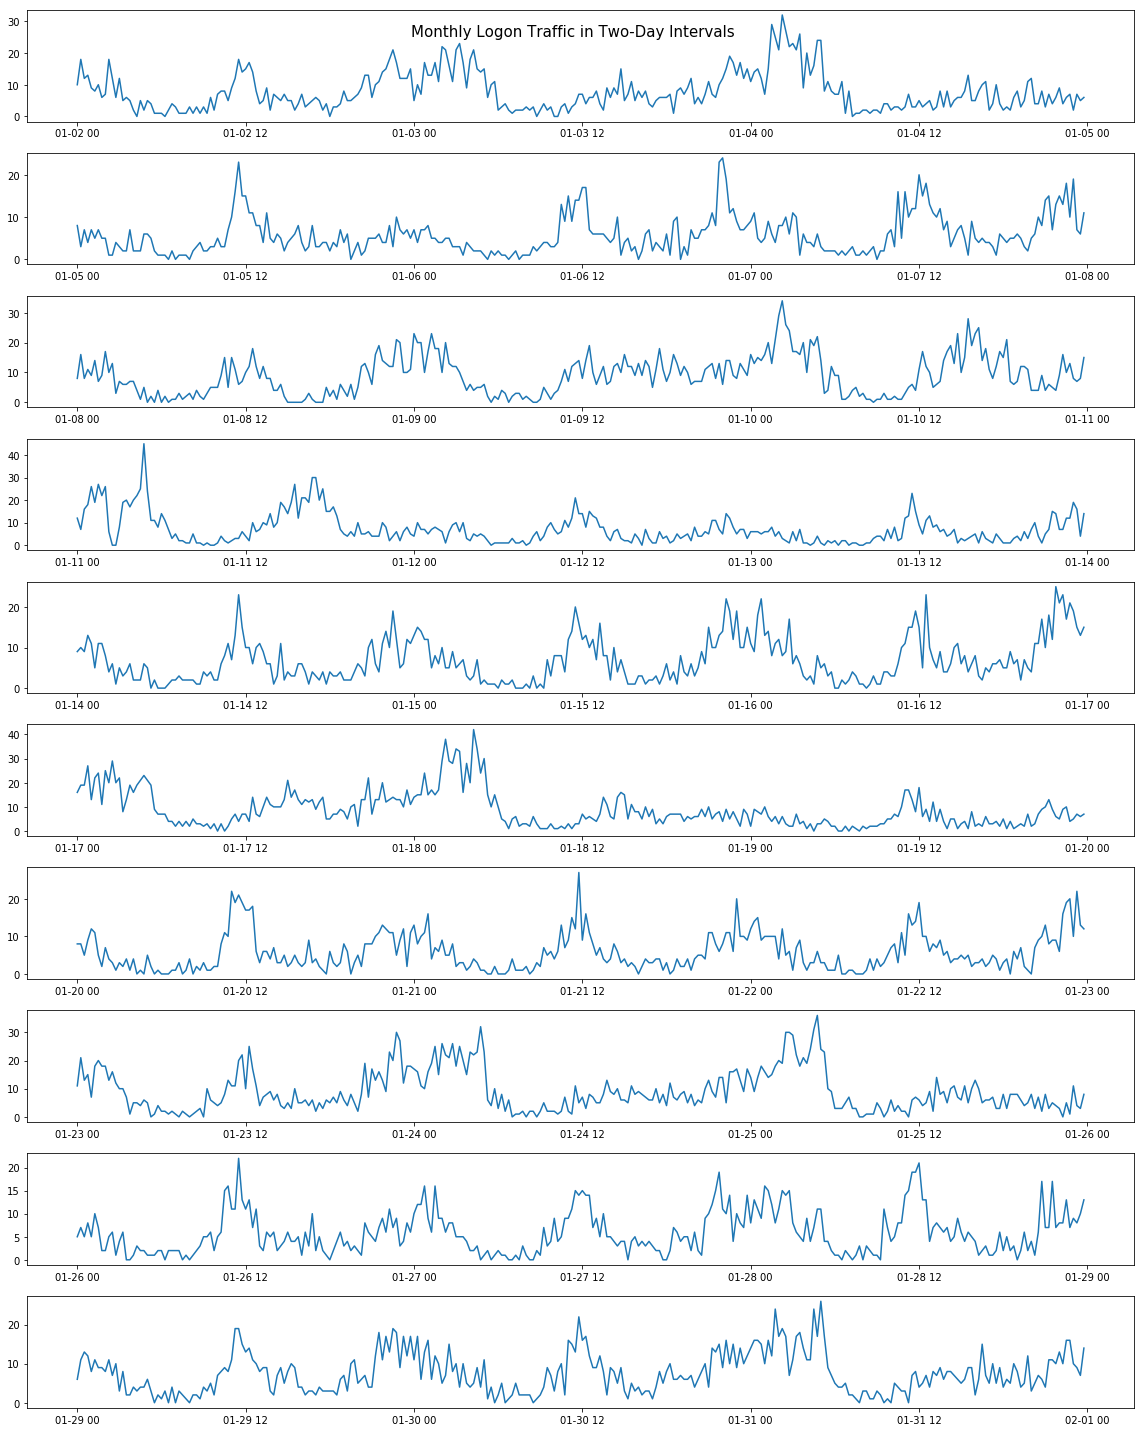

In [9]:
fig3,axs= plt.subplots(nrows=10,figsize=(16,20))

fig3.suptitle('Monthly Logon Traffic in Two-Day Intervals',fontsize=15)

#starting from 01-02 as 01-01 contains partial data
start_month = 1
start_date = 2


for i in range(10):
    
    axs[i].plot(ft_M[f'1970-{start_month}-{start_date}':f'1970-{start_month}-{int(start_date)+2}'])
    start_date+=3
    
fig3.tight_layout()


### Part 2 - Experiment and Metrics Design

**1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

The success metrics for the experiments would be seeing increasing trend on drivers serving both cities instead of one.  <br> This is a most direct way to find out if any single city users have transitioned to multi cities.

**2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on**
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the observation**
    - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Assuming we have, for each drivers, their trip records consisting from and to, we will be able to find out if drivers situated in one city have expanded their routes to multi cities. <br>
Drivers with route records specific to either of the cities would be the primary target market we are aiming to.

From the date the reimbursement benefit goes live, we can grab the update route records from the targeted as well as all drivers to check for diversity in the destinations.

We can perform statistical hypothesis testing with :
- Ho = reimbursement has no impact on expanding driver routes to different city
- Ha = reimbursemant has impact on expanding driver routes to different city

With the updated data collected after the benefit GOLIVE, we can check for the p value from the above hypothesis testing to see the likelihood of drivers' routs expanding given reimbursement has no impact.  
If the p value is less than our significance level, we can conclude that reimbursement benefit has increased the effecticveness of the proposed change.

### Part 3 - Experiment and Metrics Design

In [10]:
import json

#import dataset
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
ulti = pd.DataFrame(data)


#ulti = pd.read_json('ultimate_data_challenge.json',orient='records')

In [11]:
ulti.info()
#there are a few NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
ulti.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


**Exploratory Data Analysis**

The goal of this project is to determine whether or not drivers will be active during their 6th month on the system.  <br> Since we are working with driver data whom signed up in January, the data in scope is already set to perdicting driver activeness in June.  

Due to this reason, we do not need to have singup_date as part of our predictors.

Reading into the data with this context in mind, it is important to distinguish which features will be useful for modeling and which will not.  <br>
Column avg_dist contains the average distance in miles per trip taken in the first 30 days after signup.<br>
Meaning this feature represents the activeness during the first month of signup.  <br> Would this data impact whether the driver will be retained in their 6th months into signing up?<br>
What about number of trips in the first month?

These features also may not be useful during modeling.

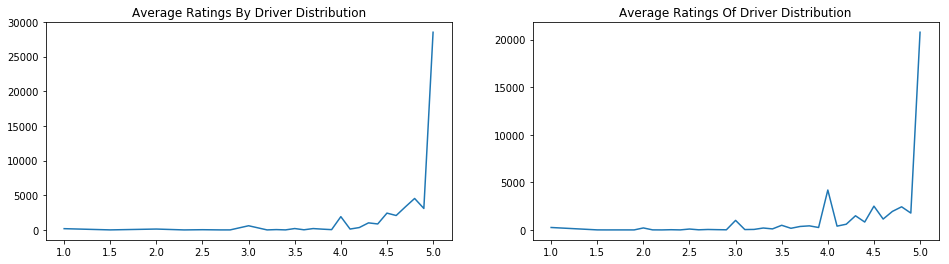

In [13]:
#plot charts for rating distributions
rating_by_driver = ulti.groupby('avg_rating_by_driver').avg_rating_by_driver.count()
rating_of_driver = ulti.groupby('avg_rating_of_driver').avg_rating_of_driver.count()

fig4, axs = plt.subplots(ncols=2,figsize=(16,4))

axs[0].set_title('Average Ratings By Driver Distribution')
axs[0].plot(rating_by_driver.index, rating_by_driver.values)

axs[1].set_title('Average Ratings Of Driver Distribution')
axs[1].plot(rating_of_driver.index, rating_of_driver.values)

plt.show()

Nothing particularly significant is found for distribution of ratings from both by and of drivers. <br> It seems for the most part both drivers and the riders are giving each other near 5.0 ratings.  <br> The other trend shown here is that reviewers are usually in favor of giving a rounded number rating like 3.0 , 4.0 , 5.0 etc.

There are a few NaN for these two columns.  As the distribution is very predictable, filling these NaN with mean approach may be sound.

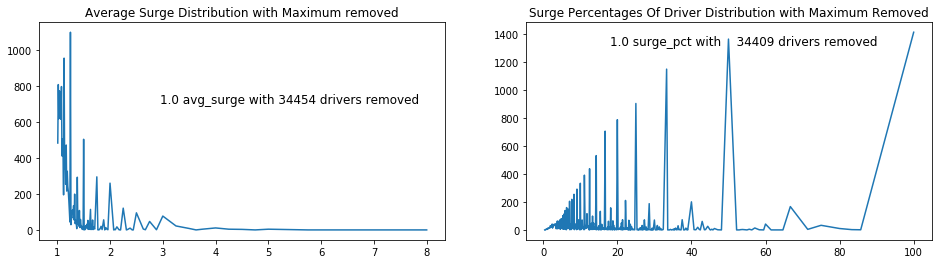

In [14]:
#plot charts for surge distributions
avg_surge = ulti.groupby('avg_surge').avg_surge.count()
surge_pct = ulti.groupby('surge_pct').surge_pct.count()

fig5, axs = plt.subplots(ncols=2,figsize=(16,4))

axs[0].set_title('Average Surge Distribution with Maximum removed')
axs[0].plot(avg_surge.iloc[1:].index, avg_surge.iloc[1:].values)

fig5.text(0.23,0.6,'1.0 avg_surge with 34454 drivers removed',fontsize=12)

axs[1].set_title('Surge Percentages Of Driver Distribution with Maximum Removed')
axs[1].plot(surge_pct.iloc[1:].index, surge_pct.iloc[1:].values)

fig5.text(0.62,0.8,'1.0 surge_pct with    34409 drivers removed',fontsize=12)


plt.show()

Charts above show the distribution for average surge and surge percentages with maximum removed as the difference was too big for charts to show valuable data. <br>
The maximum points, 1.0 avg surge and 1.0 surge percentage, having 34454 and 34409 drivers respectively show that out of 50000 drivers, those number of drivers are not utilizing the surge multiplier features at all.

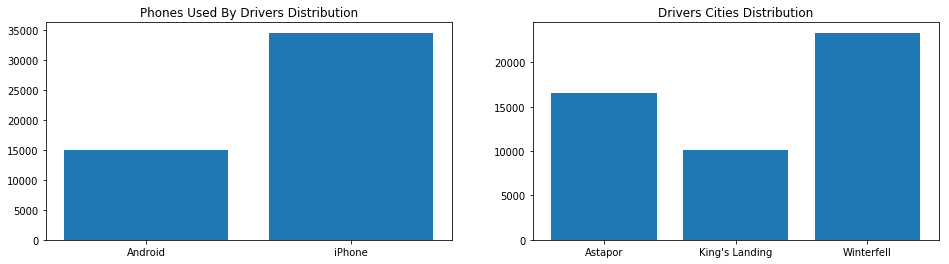

In [15]:
#plot for devices and city signed up distributions.
phones = ulti.groupby('phone').phone.count()
cities = ulti.groupby('city').city.count()

fig6, axs = plt.subplots(ncols=2,figsize=(16,4))

axs[0].set_title('Phones Used By Drivers Distribution')
axs[0].bar(phones.index, phones.values)

axs[1].set_title('Drivers Cities Distribution')
axs[1].bar(cities.index, cities.values)

plt.show()


**Null Check**

In [16]:
#fill NaN for avg_rating_by_driver and avg_rating_of_driver with mean of the column
ulti['avg_rating_by_driver'].fillna(ulti['avg_rating_by_driver'].mean(),inplace=True)
ulti['avg_rating_of_driver'].fillna(ulti['avg_rating_of_driver'].mean(),inplace=True)
print('')

In [17]:
#fill NaN for phone with 'unknown'
ulti['phone'].fillna('unknown',inplace=True)

In [18]:
ulti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


**Column Prediction**

The goal of this project is to predict driver retention at 6th month.  <br> Currently, there is no feature that specifies this so we'll need to feature engineer one.

In [19]:
#use last_trip_date to find mark all drivers who worked in the month of June

#parse last_trip_date as datetime
ulti['last_trip_date'] = pd.to_datetime(ulti['last_trip_date'])

ulti['retention'] = [1 if x > pd.to_datetime('2014-05-31') else 0 for x in ulti['last_trip_date']]

**Feature Engineering**

In [20]:
#drop avg_dist and signup_date as these two fields are not one of the dependent variables to our model
ulti.drop(['avg_dist','signup_date'],axis=1,inplace=True)

#drop trips_in_first_30_days and last_trip_date
ulti.drop(['last_trip_date','trips_in_first_30_days'],axis=1,inplace=True)



In [21]:
#feature engineer to encode city
one_hot = pd.get_dummies(ulti['city'])
ulti = ulti.join(one_hot)

#drop city
ulti.drop(['city'],axis=1,inplace=True)

#rename for easy identification
ulti.rename(columns={"Astapor": "city_astapor", "King\'s Landing": "city_kingslanding", "Winterfell":"city_winterfell"},inplace=True)
print('')

In [22]:
#feature engineer to encode phone
one_hot2 = pd.get_dummies(ulti['phone'])
ulti = ulti.join(one_hot2)

#drop phone
ulti.drop(['phone'],axis=1,inplace=True)

#rename for easy identification
ulti.rename(columns={"iPhone": "phone_iPhone", "Android": "phone_android", "unknown":"phone_unknown"},inplace=True)
print('')

In [23]:
#encode ultimate_black_user
ulti['ultimate_black_user'] = [1 if x == True else 0 for x in ulti['ultimate_black_user']]

In [24]:
ulti.head()

,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,retention,city_astapor,city_kingslanding,city_winterfell,phone_android,phone_iPhone,phone_unknown
0,5.0,4.7,1.10,15.4,1,46.2,1,0,1,0,0,1,0
1,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,0
2,5.0,4.3,1.00,0.0,0,100.0,0,1,0,0,0,1,0
3,4.9,4.6,1.14,20.0,1,80.0,1,0,1,0,0,1,0
4,4.9,4.4,1.19,11.8,0,82.4,0,0,0,1,1,0,0


In [25]:
ulti.groupby('retention').retention.count()

retention
0    31196
1    18804
Name: retention, dtype: int64

In [26]:
#isolate the prediction variable
outcome = ulti.retention

ulti.drop(columns=['retention'],inplace=True)

**Predictive Modeling**

In [27]:
#import relevant library
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [63]:
#method to calculate prevalence
def calc_prevalence(y):
    return (sum(y)/len(y))

#method to calculate specificity
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

'''
takes in actual and predicted outcome and threshold
outputs auc, accuracy, recall, precision, specificity 

'''
def print_report(y_actual, y_pred, thresh):
 
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('')


In [29]:
#split dataset to test and train
var_train,var_test,out_train,out_test = train_test_split(ulti,outcome,test_size=0.3, random_state=0)

In [30]:
#set prevalence as threshold
thresh = calc_prevalence(outcome.values)

In [31]:
#instantiate a classifier with out of box settings.
rf = RandomForestClassifier(random_state=0)

#fit train data
rf.fit(var_train,out_train)

#make prediction
rf_test_pred = rf.predict(var_test)
rf_test_proba = rf.predict_proba(var_test)[:,1]
rf_train_proba = rf.predict_proba(var_train)[:,1]

#model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(out_test, rf_test_pred))

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.7566


In [45]:
#create an SVM classifier out of box
svm = SVC(random_state=0,probability=True)

#train the model
svm.fit(var_train,out_train)

#SVM prediction
svm_test_pred = svm.predict(var_test)
svm_test_proba = svm.predict_proba(var_test)[:,1]
svm_train_proba = svm.predict_proba(var_train)[:,1]

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(out_test, svm_test_pred))

/Users/byungchankim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7713333333333333


In [47]:
#create instance
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=0)

#fit the model
logreg.fit(var_train,out_train)

#predict values
lr_test_pred = logreg.predict(var_test)
lr_test_proba = logreg.predict_proba(var_test)[:,1]
lr_train_proba = logreg.predict_proba(var_train)[:,1]

print("Accuracy:",metrics.accuracy_score(out_test, lr_test_pred))

Accuracy: 0.6965333333333333


We will compare the performance of these models via roc curve.  Since we are working with pretty balanced dataset, roc curve is preferred over precision-recall curve.

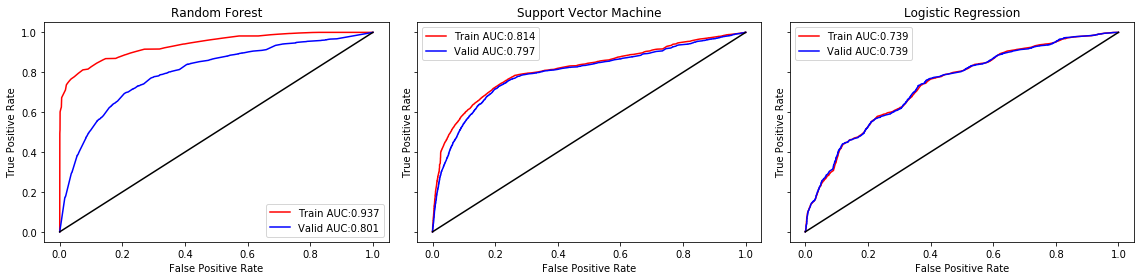

In [62]:
fpr_rf_train, tpr_rf_train, thresholds_rf_train = roc_curve(out_train, rf_train_proba)
auc_rf_train = roc_auc_score(out_train, rf_train_proba)
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(out_test, rf_test_proba)
auc_rf_test = roc_auc_score(out_test, rf_test_proba)



fpr_svm_train, tpr_svm_train, thresholds_svm_train = roc_curve(out_train, svm_train_proba)
auc_svm_train = roc_auc_score(out_train, svm_train_proba)
fpr_svm_test, tpr_svm_test, thresholds_svm_test = roc_curve(out_test, svm_test_proba)
auc_svm_test = roc_auc_score(out_test, svm_test_proba)



fpr_lr_train, tpr_lr_train, thresholds_lr_train = roc_curve(out_train, lr_train_proba)
auc_lr_train = roc_auc_score(out_train, lr_train_proba)
fpr_lr_test, tpr_lr_test, thresholds_lr_test = roc_curve(out_test, lr_test_proba)
auc_lr_test = roc_auc_score(out_test, lr_test_proba)


fig7, axs = plt.subplots(ncols=3,figsize=(16,4),sharex=True,sharey=True)

axs[0].set_title('Random Forest')
axs[0].plot(fpr_rf_train, tpr_rf_train, 'r-',label ='Train AUC:%.3f'%auc_rf_train)
axs[0].plot(fpr_rf_test, tpr_rf_test, 'b-',label ='Valid AUC:%.3f'%auc_rf_test)
axs[0].plot([0,1],[0,1],'k-')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend()

axs[1].set_title('Support Vector Machine')
axs[1].plot(fpr_svm_train, tpr_svm_train, 'r-',label ='Train AUC:%.3f'%auc_svm_train)
axs[1].plot(fpr_svm_test, tpr_svm_test, 'b-',label ='Valid AUC:%.3f'%auc_svm_test)
axs[1].plot([0,1],[0,1],'k-')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend()

axs[2].set_title('Logistic Regression')
axs[2].plot(fpr_lr_train, tpr_lr_train, 'r-',label ='Train AUC:%.3f'%auc_lr_train)
axs[2].plot(fpr_lr_test, tpr_lr_test, 'b-',label ='Valid AUC:%.3f'%auc_lr_test)
axs[2].plot([0,1],[0,1],'k-')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend()

fig7.tight_layout()

In [64]:
print('Random Forest')
print('Training:')
print_report(out_train,rf_train_proba,thresh)

print('')
print('Test:')
print_report(out_test,rf_test_proba,thresh)

Random Forest
Training:
AUC:0.937
accuracy:0.869
recall:0.842
precision:0.817
specificity:0.886
prevalence:0.377


Test:
AUC:0.801
accuracy:0.748
recall:0.715
precision:0.648
specificity:0.768
prevalence:0.374



In [65]:
print('Support Vector Machine')
print('Training:')
print_report(out_train,svm_train_proba,thresh)

print('')
print('Test:')
print_report(out_test,svm_test_proba,thresh)


Support Vector Machine
Training:
AUC:0.814
accuracy:0.779
recall:0.662
precision:0.728
specificity:0.850
prevalence:0.377


Test:
AUC:0.797
accuracy:0.770
recall:0.647
precision:0.711
specificity:0.843
prevalence:0.374



In [66]:
print('Logistic Regression')
print('Training:')
print_report(out_train,lr_train_proba,thresh)

print('')
print('Test:')
print_report(out_test,lr_test_proba,thresh)

Logistic Regression
Training:
AUC:0.739
accuracy:0.671
recall:0.617
precision:0.557
specificity:0.704
prevalence:0.377


Test:
AUC:0.739
accuracy:0.671
recall:0.608
precision:0.555
specificity:0.709
prevalence:0.374



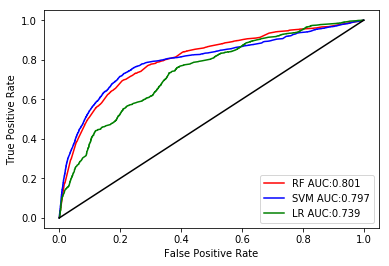

In [51]:
#get tpr, fpr, list of thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(out_test, rf_test_proba)
#get auc score for the roc
auc_rf = roc_auc_score(out_test, rf_test_proba)

#repeat for other models
fpr_svm, tpr_svm, thresholds_svm = roc_curve(out_test, svm_test_proba)
auc_svm = roc_auc_score(out_test, svm_test_proba)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(out_test, lr_test_proba)
auc_lr = roc_auc_score(out_test, lr_test_proba)

plt.plot(fpr_rf, tpr_rf, 'r-',label ='RF AUC:%.3f'%auc_rf)
plt.plot(fpr_svm, tpr_svm, 'b-',label ='SVM AUC:%.3f'%auc_svm)
plt.plot(fpr_lr, tpr_lr, 'g-',label ='LR AUC:%.3f'%auc_lr)
plt.plot([0,1],[0,1],'k-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

It seems Random Forest or Support Vector Machine models may be a good choice to move forward.  <br> Both models performs similarly with random forest slightly higher in the true positive rate.

In [68]:
#define column names for feature importance
col_names = ulti.columns

print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), col_names), reverse=True))

[(0.2283, 'weekday_pct'), (0.1919, 'avg_rating_by_driver'), (0.1347, 'surge_pct'), (0.1323, 'avg_rating_of_driver'), (0.1105, 'avg_surge'), (0.065, 'city_kingslanding'), (0.0473, 'ultimate_black_user'), (0.0293, 'phone_android'), (0.0263, 'city_astapor'), (0.0234, 'phone_iPhone'), (0.0096, 'city_winterfell'), (0.0013, 'phone_unknown')]


From the model, we can derive that weekday percentage has the highest importance when its comes to this model's predicting power and closely followed by the average rating by driver, surge percentage and average rating of driver.<br> This means that drivers who are committed to working on weekdays are likely to continue working after 6 months. As well as drivers who are taking advantage of the surge multiplier bonus would obviously have more incentive to stay with the program.  <br> The interesting aspect to note is average rating by driver has gotten 19% weight where as average rating of driver has 13%. <br> Both are considered high but this reveals an interesting insight.  <br> Average rating by driver feature is rating given by the driver to the riders. <br>Meaning this is a representation of the driver's experience.  It is clear that drivers need to be happy when they are working. <br>Average rating of driver is a rating given by riders to the drivers and represents the service the driver has provided. <br>Drivers showing professionalism would have higher chance of continuing work.